In [277]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [278]:
df = pd.read_csv('heart_out.csv')

In [279]:
df.head()

,Unnamed: 0,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0,63,1,145,233,1,150,0,2.3,0,...,1,0,0,1,0,0,0,1,0,0
1,1,37,1,130,250,0,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,2,41,0,130,204,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,3,56,1,120,236,0,178,0,0.8,0,...,0,1,0,0,0,1,0,0,1,0
4,4,57,0,120,354,0,163,1,0.6,0,...,0,1,0,0,0,1,0,0,1,0


In [280]:
X = df.drop(columns = ['target'])
y = df['target']
print(y.head())
print(X.head())


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
   Unnamed: 0  age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
0           0   63    1       145   233    1      150      0      2.3   0   
1           1   37    1       130   250    0      187      0      3.5   0   
2           2   41    0       130   204    0      172      0      1.4   0   
3           3   56    1       120   236    0      178      0      0.8   0   
4           4   57    0       120   354    0      163      1      0.6   0   

   ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  \
0  ...          1          0          0        1        0        0       0   
1  ...          0          1          0        1        0        0       0   
2  ...          1          0          0        0        0        1       0   
3  ...          0          1          0        0        0        1       0   
4  ...          0          1          0        0        0        1       0   

   tha

In [281]:
gnb = GaussianNB()
scores = []
scores_train = []
kf = KFold(n_splits = 3, shuffle=True, random_state=22)
gnb_table_both = pd.DataFrame(columns = ['Train Accuracy', 'Test Accuracy'], index = ['Fold 1', 'Fold 2', 'Fold 3'])
gnb_table_test = pd.DataFrame(columns = ['Test Accuracy'], index = ['Fold 1', 'Fold 2', 'Fold 3'])
gnb_table_train = pd.DataFrame(columns = ['Train Accuracy'], index = ['Fold 1', 'Fold 2', 'Fold 3'])
for train, test in kf.split(X):
    gnb.fit(X.iloc[train], y.iloc[train])
    scores.append(gnb.score(X.iloc[test], y.iloc[test]))
    scores_train.append(gnb.score(X.iloc[train], y.iloc[train]))


gnb_table_test['Test Accuracy'] = scores
gnb_table_train['Train Accuracy'] = scores_train
gnb_table_both['Test Accuracy'] = scores
gnb_table_both['Train Accuracy'] = scores_train
gnb_table_both

,Train Accuracy,Test Accuracy
Fold 1,0.930693,0.831683
Fold 2,0.900990,0.900990
Fold 3,0.900990,0.881188


In [282]:
# gnb_table_1 = gnb_table['Test Accuracy'].transpose()
# gnb_table_1
gnb_table_test = gnb_table_test.transpose()
gnb_table_test

,Fold 1,Fold 2,Fold 3
Test Accuracy,0.831683,0.90099,0.881188


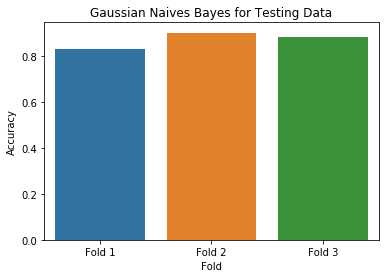

In [283]:
bargraph = sns.barplot(data = gnb_table_test)
bargraph.set(xlabel = 'Fold', ylabel = 'Accuracy', title = 'Gaussian Naives Bayes for Testing Data')
bargraph

In [284]:
gnb_table_train = gnb_table_train.transpose()
gnb_table_train

,Fold 1,Fold 2,Fold 3
Train Accuracy,0.930693,0.90099,0.90099


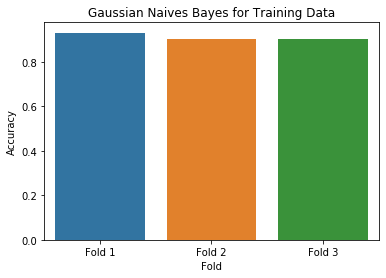

In [285]:
bargraph = sns.barplot(data = gnb_table_train)
bargraph.set(xlabel = 'Fold', ylabel = 'Accuracy', title = 'Gaussian Naives Bayes for Training Data')
bargraph

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[38  4]
 [ 7 51]]


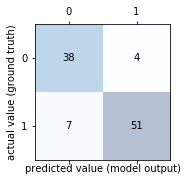

In [287]:
fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()

In [288]:

forest_size = [1,5,10,20,30, 40, 50]
kf = KFold(n_splits = 3, shuffle=True, random_state=22)
forest_table_test = pd.DataFrame(columns = forest_size)
forest_table_train = pd.DataFrame(columns = forest_size)

for count in forest_size:
    rand_forest = RandomForestClassifier(criterion='gini', n_estimators=count, max_depth=3, random_state=0, n_jobs=-1)
    scores = []
    scores_train = []
    for train, test in kf.split(X):
        rand_forest.fit(X.iloc[train], y.iloc[train])
        scores.append(rand_forest.score(X.iloc[test], y.iloc[test]))
        scores_train.append(rand_forest.score(X.iloc[train], y.iloc[train]))
    forest_table_test[count] = scores
    forest_table_train[count] = scores_train
forest_table_test




,1,5,10,20,30,40,50
0,0.712871,0.900990,0.970297,0.940594,0.930693,0.960396,0.990099
1,0.752475,0.910891,0.960396,0.970297,0.950495,0.960396,0.970297
2,0.801980,0.950495,0.980198,0.930693,0.970297,0.980198,0.990099


In [289]:
print(forest_table_train)

1         5         10        20        30        40        50
0  0.797030  0.935644  0.980198  0.990099  0.985149  0.990099  0.995050
1  0.787129  0.915842  0.980198  0.985149  0.975248  0.980198  0.985149
2  0.836634  0.960396  0.975248  0.960396  0.985149  0.990099  0.990099


In [290]:
forest_table_test = forest_table_test.transpose()
forest_table_test = forest_table_test.rename(columns={0: "Fold 1", 1: "Fold 2", 2: "Fold 3"}, errors="raise")
forest_table_test

,Fold 1,Fold 2,Fold 3
1,0.712871,0.752475,0.801980
5,0.900990,0.910891,0.950495
10,0.970297,0.960396,0.980198
20,0.940594,0.970297,0.930693
30,0.930693,0.950495,0.970297
40,0.960396,0.960396,0.980198
50,0.990099,0.970297,0.990099


In [291]:
forest_table_train = forest_table_train.transpose()
forest_table_train = forest_table_train.rename(columns={0: "Fold 1", 1: "Fold 2", 2: "Fold 3"}, errors="raise")
forest_table_train

,Fold 1,Fold 2,Fold 3
1,0.797030,0.787129,0.836634
5,0.935644,0.915842,0.960396
10,0.980198,0.980198,0.975248
20,0.990099,0.985149,0.960396
30,0.985149,0.975248,0.985149
40,0.990099,0.980198,0.990099
50,0.995050,0.985149,0.990099


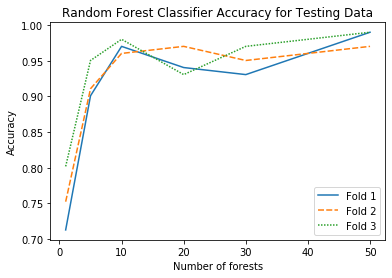

In [292]:
graph = sns.lineplot(data = forest_table_test, style = 'fold')
graph.set(xlabel = 'Number of forests', ylabel = 'Accuracy', title = 'Random Forest Classifier Accuracy for Testing Data')
graph

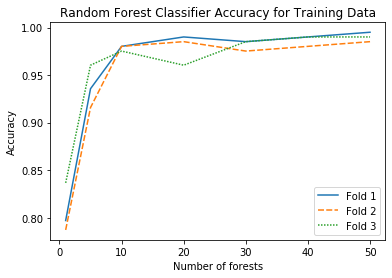

In [293]:
graph = sns.lineplot(data = forest_table_train, style = 'fold')
graph.set(xlabel = 'Number of forests', ylabel = 'Accuracy', title = 'Random Forest Classifier Accuracy for Training Data')
graph

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rand_forest = RandomForestClassifier(criterion='gini', n_estimators=10, max_depth=3,random_state=0, n_jobs=-1)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[39  3]
 [ 4 54]]


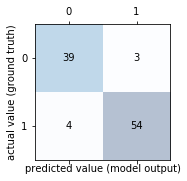

In [295]:
fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()

In [302]:

knn_test = pd.DataFrame()
knn_train = pd.DataFrame()
knncount = [1,2,3,4,5,6,7,8,9, 10]
kf = KFold(n_splits = 3, shuffle=True, random_state=22)
for count in knncount:
    score = []
    score_train = []
    for train, test in kf.split(X):
        knn = KNeighborsClassifier(n_neighbors = knnCount, p = 1, metric = 'minkowski') # manhattan dist here
        knn.fit(X.iloc[train], y.iloc[train])
        score.append(knn.score(X.iloc[test], y.iloc[test]))
        score_train.append(knn.score(X.iloc[train], y.iloc[train]))
        knn_test[count] = scores
        knn_train[count] = scores_train
knn_test

,1,2,3,4,5,6,7,8,9,10
0,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099
1,0.970297,0.970297,0.970297,0.970297,0.970297,0.970297,0.970297,0.970297,0.970297,0.970297
2,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099


In [303]:
knn_train

,1,2,3,4,5,6,7,8,9,10
0,0.995050,0.995050,0.995050,0.995050,0.995050,0.995050,0.995050,0.995050,0.995050,0.995050
1,0.985149,0.985149,0.985149,0.985149,0.985149,0.985149,0.985149,0.985149,0.985149,0.985149
2,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099,0.990099


In [304]:
knn_test = knn_test.transpose()
knn_test = knn_test.rename(columns={0: "Fold 1", 1: "Fold 2", 2: "Fold 3"}, errors="raise")
knn_test

,Fold 1,Fold 2,Fold 3
1,0.990099,0.970297,0.990099
2,0.990099,0.970297,0.990099
3,0.990099,0.970297,0.990099
4,0.990099,0.970297,0.990099
5,0.990099,0.970297,0.990099
6,0.990099,0.970297,0.990099
7,0.990099,0.970297,0.990099
8,0.990099,0.970297,0.990099
9,0.990099,0.970297,0.990099
10,0.990099,0.970297,0.990099


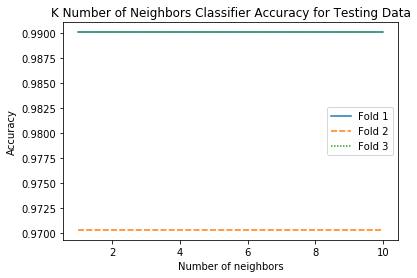

In [309]:
graph = sns.lineplot(data = knn_test, style = 'fold')
graph.set(xlabel = 'Number of neighbors', ylabel = 'Accuracy', title = 'K Number of Neighbors Classifier Accuracy for Testing Data')
graph

In [305]:
knn_train = knn_train.transpose()
knn_train = knn_train.rename(columns={0: "Fold 1", 1: "Fold 2", 2: "Fold 3"}, errors="raise")
knn_train

,Fold 1,Fold 2,Fold 3
1,0.99505,0.985149,0.990099
2,0.99505,0.985149,0.990099
3,0.99505,0.985149,0.990099
4,0.99505,0.985149,0.990099
5,0.99505,0.985149,0.990099
6,0.99505,0.985149,0.990099
7,0.99505,0.985149,0.990099
8,0.99505,0.985149,0.990099
9,0.99505,0.985149,0.990099
10,0.99505,0.985149,0.990099


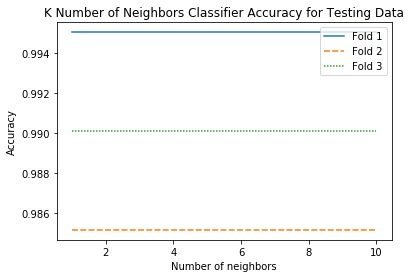

In [308]:
graph = sns.lineplot(data = knn_train, style = 'fold')
graph.set(xlabel = 'Number of neighbors', ylabel = 'Accuracy', title = 'K Number of Neighbors Classifier Accuracy for Testing Data')
graph

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 1, p = 1, metric = 'minkowski') # manhattan dist here
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[41  1]
 [ 1 57]]


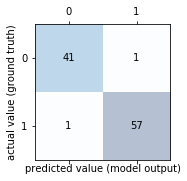

In [313]:
fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()